# Cancer Cell Line Encyclopedia (CCLE)

Author: Moshe Silverstein <br/>
Date: 7-17 <br/>
Data Source: http://software.broadinstitute.org/software/cprg/?q=node/11

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [3]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/CCLE/my_functions.py'>

# Versions Of Modules In Use

In [4]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Wed Dec 13 13:39:03 2017 EST

# Functions

## Load Sample Metadata 

In [5]:
sample_meta = pd.read_csv('Input/CCLE_Expression.Arrays.sif_2012-10-18.txt', sep='\t', index_col=1)

In [6]:
sample_meta.head()

,ID,Cell line primary name,Gender,Batch,Site Primary,Histology,Hist Subtype1
CCLE name,,,,,,,
LN18_CENTRAL_NERVOUS_SYSTEM,METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A02_240852,LN-18,M,1,central_nervous_system,glioma,astrocytoma_Grade_IV
769P_KIDNEY,METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A05_240858,769-P,F,1,kidney,carcinoma,clear_cell_renal_cell_carcinoma
786O_KIDNEY,METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A07_240862,786-O,M,1,kidney,carcinoma,clear_cell_renal_cell_carcinoma
CAOV3_OVARY,METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A08_240864,Caov-3,F,1,ovary,carcinoma,adenocarcinoma
HEPG2_LIVER,METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A09_240866,Hep G2,M,1,liver,carcinoma,hepatocellular_carcinoma


## Load Data

In [7]:
matrix = pd.read_csv('Input/CCLE_Expression_Entrez_2012-09-29.gct', sep='\t', skiprows=2)

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
matrix.head()

,Name,Description,LN18_CENTRAL_NERVOUS_SYSTEM,769P_KIDNEY,786O_KIDNEY,CAOV3_OVARY,HEPG2_LIVER,MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH524_LUNG,NCIH209_LUNG,...,SLR21_KIDNEY,LNZ308_CENTRAL_NERVOUS_SYSTEM,LN340_CENTRAL_NERVOUS_SYSTEM,HCC827GR5_LUNG,SLR20_KIDNEY,HK2_KIDNEY,EW8_BONE,UOK101_KIDNEY,JHESOAD1_OESOPHAGUS,CH157MN_CENTRAL_NERVOUS_SYSTEM
0,100009676_at,LOC100009676,5.987545,5.444892,5.838828,6.074743,5.788600,5.459675,5.755560,7.190493,...,5.473156,5.517208,5.858379,5.196033,5.831437,5.362021,5.799747,5.865606,5.463812,5.720593
1,10000_at,AKT3,6.230233,7.544216,7.328450,4.270720,4.478293,6.212102,7.562398,8.642669,...,6.375324,6.119814,6.561409,4.521773,6.830904,7.031690,4.881235,6.914640,5.313795,5.757825
2,10001_at,MED6,9.363550,8.715909,8.410834,9.845271,9.761157,10.532820,10.393960,9.478429,...,8.849773,8.767192,8.521635,8.224544,9.325785,8.362727,8.990524,8.958629,9.748100,9.758431
3,10002_at,NR2E3,3.803069,4.173643,3.776557,3.934091,3.822202,3.949198,3.807546,3.930186,...,3.717506,3.977377,3.659459,3.933996,4.515748,4.434658,4.127832,3.942736,4.062648,4.074257
4,10003_at,NAALAD2,3.586430,3.663081,4.047007,3.817250,6.444302,4.081071,5.462774,4.252446,...,3.520843,4.036661,4.168351,3.535915,4.445632,3.622032,5.436580,3.666404,3.556565,3.728828


## Set Matrix to Show Gene Symbols

In [9]:
matrix.rename(columns={'Description':'Gene Symbol'}, inplace=True)

In [10]:
matrix.set_index('Gene Symbol', inplace=True)

In [11]:
matrix.drop('Name', axis=1, inplace=True)

In [12]:
matrix.head()

,LN18_CENTRAL_NERVOUS_SYSTEM,769P_KIDNEY,786O_KIDNEY,CAOV3_OVARY,HEPG2_LIVER,MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH524_LUNG,NCIH209_LUNG,MIAPACA2_PANCREAS,MCAS_OVARY,...,SLR21_KIDNEY,LNZ308_CENTRAL_NERVOUS_SYSTEM,LN340_CENTRAL_NERVOUS_SYSTEM,HCC827GR5_LUNG,SLR20_KIDNEY,HK2_KIDNEY,EW8_BONE,UOK101_KIDNEY,JHESOAD1_OESOPHAGUS,CH157MN_CENTRAL_NERVOUS_SYSTEM
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
LOC100009676,5.987545,5.444892,5.838828,6.074743,5.788600,5.459675,5.755560,7.190493,5.449818,5.801820,...,5.473156,5.517208,5.858379,5.196033,5.831437,5.362021,5.799747,5.865606,5.463812,5.720593
AKT3,6.230233,7.544216,7.328450,4.270720,4.478293,6.212102,7.562398,8.642669,5.556191,6.808673,...,6.375324,6.119814,6.561409,4.521773,6.830904,7.031690,4.881235,6.914640,5.313795,5.757825
MED6,9.363550,8.715909,8.410834,9.845271,9.761157,10.532820,10.393960,9.478429,9.112954,9.815614,...,8.849773,8.767192,8.521635,8.224544,9.325785,8.362727,8.990524,8.958629,9.748100,9.758431
NR2E3,3.803069,4.173643,3.776557,3.934091,3.822202,3.949198,3.807546,3.930186,4.161937,4.028581,...,3.717506,3.977377,3.659459,3.933996,4.515748,4.434658,4.127832,3.942736,4.062648,4.074257
NAALAD2,3.586430,3.663081,4.047007,3.817250,6.444302,4.081071,5.462774,4.252446,3.932451,3.835827,...,3.520843,4.036661,4.168351,3.535915,4.445632,3.622032,5.436580,3.666404,3.556565,3.728828


# Histogram of First Sample

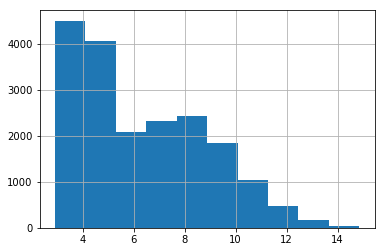

In [13]:
matrix.iloc[:, 0].hist();

# Histogram of First Gene

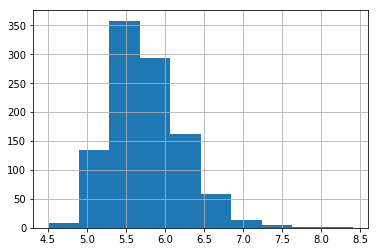

In [14]:
matrix.iloc[0, :].hist();

# Save Unfiltered Sample Matrix To File

In [15]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Log2 Transform

In [16]:
normalized_matrix = mf.log2(matrix)

# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [17]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [18]:
normalized_matrix.head()

,LN18_CENTRAL_NERVOUS_SYSTEM,769P_KIDNEY,786O_KIDNEY,CAOV3_OVARY,HEPG2_LIVER,MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH524_LUNG,NCIH209_LUNG,MIAPACA2_PANCREAS,MCAS_OVARY,...,SLR21_KIDNEY,LNZ308_CENTRAL_NERVOUS_SYSTEM,LN340_CENTRAL_NERVOUS_SYSTEM,HCC827GR5_LUNG,SLR20_KIDNEY,HK2_KIDNEY,EW8_BONE,UOK101_KIDNEY,JHESOAD1_OESOPHAGUS,CH157MN_CENTRAL_NERVOUS_SYSTEM
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
LOC100009676,2.792691,2.717358,2.792019,2.794189,2.757648,2.732784,2.741136,3.016166,2.712445,2.780647,...,2.664627,2.703281,2.763699,2.587849,2.753469,2.628623,2.750337,2.771534,2.665826,2.740670
AKT3,2.838888,3.099018,3.057718,2.397224,2.461344,2.874932,3.089446,3.260833,2.732901,2.976620,...,2.882207,2.837634,2.907438,2.429785,2.954894,3.008941,2.516845,2.980435,2.629029,2.750337
MED6,3.368981,3.279511,3.230255,3.432240,3.419995,3.509972,3.496921,3.384545,3.326996,3.430442,...,3.313016,3.287789,3.249583,3.218033,3.362708,3.244687,3.325592,3.313989,3.424978,3.420571
NR2E3,2.281060,2.373993,2.247252,2.310389,2.276574,2.302860,2.291889,2.328591,2.387928,2.320287,...,2.244347,2.310819,2.233569,2.290139,2.457867,2.411836,2.334216,2.304309,2.330678,2.323673
NAALAD2,2.210096,2.215710,2.332528,2.279505,2.881008,2.341552,2.680526,2.415018,2.317020,2.260960,...,2.190732,2.325089,2.375426,2.185617,2.439897,2.212152,2.654054,2.226434,2.197812,2.233975


# Nomalize Matrix (z-score the rows)

In [19]:
genes = normalized_matrix.index.values.tolist()

In [20]:
normalized_matrix.reset_index(inplace=True)

In [21]:
normalized_matrix.drop('Gene Symbol', axis=1, inplace=True)

In [22]:
mf.zscore(normalized_matrix, 'row')

In [23]:
normalized_matrix.index = genes

In [24]:
normalized_matrix.head()

,LN18_CENTRAL_NERVOUS_SYSTEM,769P_KIDNEY,786O_KIDNEY,CAOV3_OVARY,HEPG2_LIVER,MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH524_LUNG,NCIH209_LUNG,MIAPACA2_PANCREAS,MCAS_OVARY,...,SLR21_KIDNEY,LNZ308_CENTRAL_NERVOUS_SYSTEM,LN340_CENTRAL_NERVOUS_SYSTEM,HCC827GR5_LUNG,SLR20_KIDNEY,HK2_KIDNEY,EW8_BONE,UOK101_KIDNEY,JHESOAD1_OESOPHAGUS,CH157MN_CENTRAL_NERVOUS_SYSTEM
LOC100009676,0.391998,-0.365417,0.385242,0.407053,0.039670,-0.210317,-0.126351,2.638848,-0.414810,0.270906,...,-0.895576,-0.506949,0.100510,-1.667514,-0.002346,-1.257572,-0.033839,0.179276,-0.883521,-0.131032
AKT3,0.117319,1.089486,0.935138,-1.533287,-1.293657,0.252023,1.053715,1.694227,-0.278782,0.632057,...,0.279210,0.112632,0.373507,-1.411598,0.550861,0.752847,-1.086235,0.646312,-0.666975,-0.213619
MED6,0.234318,-0.877739,-1.489964,1.020577,0.868388,1.986733,1.824520,0.427758,-0.287535,0.998238,...,-0.461291,-0.774846,-1.249728,-1.641870,0.156346,-1.310586,-0.304986,-0.449205,0.930325,0.875542
NR2E3,-0.252500,1.317899,-0.823796,0.243110,-0.328312,0.115875,-0.069506,0.550691,1.553368,0.410354,...,-0.872882,0.250378,-1.055006,-0.099089,2.735204,1.957367,0.645739,0.140371,0.585954,0.467580
NAALAD2,-0.570330,-0.540984,0.069653,-0.207510,2.936693,0.116823,1.888723,0.500850,-0.011411,-0.304452,...,-0.671550,0.030769,0.293890,-0.698291,0.630896,-0.559585,1.750351,-0.484927,-0.634543,-0.445509


# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [25]:
mf.mapgenesymbols(normalized_matrix)

In [26]:
normalized_matrix.shape

(17514, 1037)

# Merge Duplicate Genes By Rows

In [27]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [28]:
normalized_matrix.shape

(17337, 1037)

# Map Sample Metadata to Sample ID

In [29]:
lst = []

for i,col in enumerate(normalized_matrix.columns):
    
    col = col.split('.')[0]

    progressPercent = ((i+1)/len(normalized_matrix.columns))*100

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(normalized_matrix.columns)))
    sys.stdout.flush()

    
    tissue = 'Tissue:'+(' ').join(col.split('_')[1:])
    cellline = 'Cell-Line:'+col.split('_')[0]
    gender = 'Gender:'+str(sample_meta.ix[col, 'Gender'])
    histology = 'Histology:'+sample_meta.ix[col, 'Histology'].upper()

    lst.append(tuple((tissue, cellline, gender, histology)))


normalized_matrix.columns = lst

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


# Merge Like Column (by taking the mean)

In [30]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [31]:
normalized_matrix.head()

,"(Tissue:AUTONOMIC GANGLIA, Cell-Line:CHP126, Gender:F, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:CHP212, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:IMR32, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KELLY, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNRTBM1, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNSI9S, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNYN, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:MHHNB11, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:NB1, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:NH6, Gender:nan, Histology:NEUROBLASTOMA)",...,"(Tissue:URINARY TRACT, Cell-Line:RT4, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:SCABER, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:SW1710, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:SW780, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:T24, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:TCCSUP, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:UBLC1, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:UMUC1, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:UMUC3, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:VMCUB1, Gender:M, Histology:CARCINOMA)"
index,,,,,,,,,,,,,,,,,,,,,
A1BG,0.061150,0.363364,0.775190,0.251860,0.463979,0.989795,0.870464,1.783551,1.184752,0.929649,...,-1.172933,-1.048049,-0.595673,-0.947634,-1.324057,-0.907755,-0.996395,-0.820354,0.074883,-1.446118
A1BG-AS1,0.277491,0.045649,0.728217,0.998537,-0.178796,0.195440,-0.221541,-0.538833,0.511497,-0.190140,...,-1.729218,0.351586,-0.685520,-0.130492,-2.248171,-0.711564,-1.427787,0.303201,0.659586,-1.059017
A1CF,-0.333466,-0.208228,-0.456124,-0.545437,-0.415528,-0.359914,-0.141044,-0.556374,-0.563420,-0.335947,...,-0.437279,-0.203937,-0.178824,-0.402897,-0.427072,-0.061313,-0.333959,-0.149224,-0.319659,-0.354017
A2M,-0.424442,1.151566,-0.596106,-0.233031,-0.365967,3.263003,-0.579555,-0.161783,-0.295207,-0.319042,...,-0.502725,-0.511815,-0.505589,-0.292201,-0.596432,3.256469,-0.157074,-0.543286,-0.208490,-0.144220
A2ML1,-0.044042,-0.287341,0.014433,-0.688573,-0.373021,-0.321417,-0.188700,-0.739148,0.335277,-0.060602,...,-0.214005,0.243290,-0.330796,-0.034232,0.331624,-0.183215,-0.297064,0.148682,-0.501153,0.007102


# Histogram of First Celline

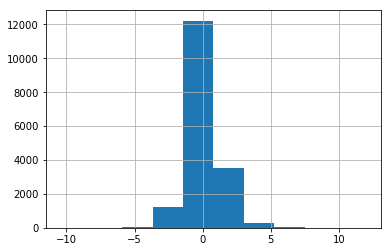

In [32]:
normalized_matrix[normalized_matrix.columns[0]].hist()

# Histogram of First Gene

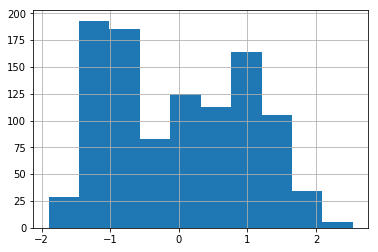

In [33]:
normalized_matrix.loc[normalized_matrix.index[0]].hist()

# Save Normalized Matrix To File

In [34]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Data

In [35]:
net.load_df(normalized_matrix.iloc[:,:100].copy())
net.filter_N_top('row', rank_type='sum', N_top=50)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Create Tertiary Matrix

Top 500 up expressed genes get a value of 1. Top 500 down expressed genes get a value of -1. All other values are set to 0.

In [36]:
tertiary_matrix = mf.createTertiaryMarix(normalized_matrix)

In [37]:
tertiary_matrix.head()

,"(Tissue:AUTONOMIC GANGLIA, Cell-Line:CHP126, Gender:F, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:CHP212, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:IMR32, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KELLY, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNRTBM1, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNSI9S, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNYN, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:MHHNB11, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:NB1, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:NH6, Gender:nan, Histology:NEUROBLASTOMA)",...,"(Tissue:URINARY TRACT, Cell-Line:RT4, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:SCABER, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:SW1710, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:SW780, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:T24, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:TCCSUP, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:UBLC1, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:UMUC1, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:UMUC3, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:VMCUB1, Gender:M, Histology:CARCINOMA)"
index,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
A1BG-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
A2ML1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Save Teriary Matrix

In [38]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [39]:
standard_matrix = mf.createStandardizedMatix(normalized_matrix)

In [40]:
standard_matrix.head()

,"(Tissue:AUTONOMIC GANGLIA, Cell-Line:CHP126, Gender:F, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:CHP212, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:IMR32, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KELLY, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNRTBM1, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNSI9S, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNYN, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:MHHNB11, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:NB1, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:NH6, Gender:nan, Histology:NEUROBLASTOMA)",...,"(Tissue:URINARY TRACT, Cell-Line:RT4, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:SCABER, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:SW1710, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:SW780, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:T24, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:TCCSUP, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:UBLC1, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:UMUC1, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:UMUC3, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:VMCUB1, Gender:M, Histology:CARCINOMA)"
index,,,,,,,,,,,,,,,,,,,,,
A1BG,0.050696,0.354615,0.511321,0.195524,0.331123,0.770524,0.557341,0.819757,0.754775,0.637942,...,-0.886660,-0.834601,-0.586524,-0.802185,-0.954113,-0.672637,-0.760964,-0.651052,0.068245,-0.906323
A1BG-AS1,0.203422,0.048974,0.486191,0.649741,-0.129912,0.202945,-0.164089,-0.419983,0.407394,-0.137531,...,-0.971665,0.337510,-0.663602,-0.116545,-0.997899,-0.558472,-0.889577,0.245235,0.553853,-0.808093
A1CF,-0.247212,-0.188948,-0.350790,-0.459783,-0.326179,-0.316926,-0.103948,-0.431833,-0.524507,-0.254006,...,-0.426934,-0.188119,-0.163956,-0.387097,-0.461300,-0.044369,-0.276794,-0.107181,-0.318083,-0.314922
A2M,-0.327793,0.818205,-0.469728,-0.182473,-0.281597,0.992499,-0.471282,-0.116547,-0.269573,-0.242399,...,-0.490502,-0.489213,-0.503687,-0.273985,-0.628262,0.985570,-0.117797,-0.447419,-0.204564,-0.118260
A2ML1,-0.029139,-0.266646,0.009953,-0.569909,-0.289269,-0.282107,-0.139968,-0.568602,0.277634,-0.039544,...,-0.200785,0.244381,-0.320638,-0.030489,0.336428,-0.136092,-0.241495,0.123691,-0.504185,0.008186


# Plot of A Single Celltype, Normalized Value vs. Standardized Value¶

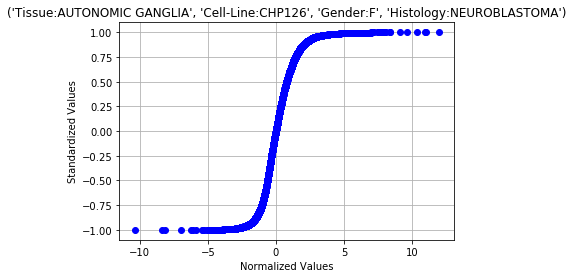

In [41]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [42]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_sample_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Path to output files¶

In [43]:
path = '/Users/moshesilverstein/Documents/Harmonizome/CCLE/Output/'

# Create Up Gene Set Library

Top 500 up expressed genes

In [44]:
name = 'ccle_gene_up_set'

In [45]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

Top 500 down expressed genes

In [46]:
name = 'ccle_gene_down_set'

In [47]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [48]:
name = 'ccle_attribute_up_set'

In [49]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [50]:
name = 'ccle_attribute_down_set'

In [51]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity matrix

In [52]:
attribute_similarity_matix = mf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [53]:
attribute_similarity_matix.head()

,"(Tissue:AUTONOMIC GANGLIA, Cell-Line:CHP126, Gender:F, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:CHP212, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:IMR32, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KELLY, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNRTBM1, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNSI9S, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNYN, Gender:nan, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:MHHNB11, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:NB1, Gender:M, Histology:NEUROBLASTOMA)","(Tissue:AUTONOMIC GANGLIA, Cell-Line:NH6, Gender:nan, Histology:NEUROBLASTOMA)",...,"(Tissue:URINARY TRACT, Cell-Line:RT4, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:SCABER, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:SW1710, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:SW780, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:T24, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:TCCSUP, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:UBLC1, Gender:F, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:UMUC1, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:UMUC3, Gender:M, Histology:CARCINOMA)","(Tissue:URINARY TRACT, Cell-Line:VMCUB1, Gender:M, Histology:CARCINOMA)"
"(Tissue:AUTONOMIC GANGLIA, Cell-Line:CHP126, Gender:F, Histology:NEUROBLASTOMA)",1.000000,0.331349,0.612660,0.571099,0.694771,0.212375,0.632541,0.490232,0.470622,0.629805,...,-0.086276,-0.248894,-0.006004,-0.110781,-0.128424,-0.041712,-0.040882,-0.140267,-0.020693,-0.106122
"(Tissue:AUTONOMIC GANGLIA, Cell-Line:CHP212, Gender:nan, Histology:NEUROBLASTOMA)",0.331349,1.000000,0.347276,0.326879,0.390673,0.380620,0.347333,0.171329,0.336643,0.404424,...,0.007380,-0.118645,-0.006215,-0.059849,-0.039184,-0.002968,-0.020010,-0.115711,0.035748,-0.091398
"(Tissue:AUTONOMIC GANGLIA, Cell-Line:IMR32, Gender:M, Histology:NEUROBLASTOMA)",0.612660,0.347276,1.000000,0.516548,0.596590,0.184289,0.600418,0.373589,0.484023,0.564340,...,-0.061879,-0.208530,-0.082744,-0.108577,-0.065688,-0.075823,-0.046384,-0.219427,0.021848,-0.138428
"(Tissue:AUTONOMIC GANGLIA, Cell-Line:KELLY, Gender:nan, Histology:NEUROBLASTOMA)",0.571099,0.326879,0.516548,1.000000,0.556232,0.195428,0.567730,0.431946,0.441993,0.528967,...,-0.032801,-0.136573,-0.106956,-0.123391,-0.095945,-0.085474,-0.079780,-0.194125,0.056092,-0.151430
"(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNRTBM1, Gender:nan, Histology:NEUROBLASTOMA)",0.694771,0.390673,0.596590,0.556232,1.000000,0.199291,0.736222,0.487150,0.489208,0.747082,...,-0.067379,-0.255871,-0.010779,-0.062794,-0.092840,-0.036653,-0.044845,-0.167604,0.018944,-0.112552


# HeatMap (clustergrammer) of Attribute Similarity Matrix

In [54]:
net.load_df(attribute_similarity_matix.iloc[:100,:100].copy())
# net.filter_N_top('row', rank_type='sum', N_top=50)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Save Attribute Similarity Matrix

In [55]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene Similarity Matrix

In [56]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [57]:
gene_similarity_matix.head()

index,A1BG,A1BG-AS1,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AACSP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
index,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.596851,-0.243931,0.189987,-0.166880,-0.128301,-0.034042,0.007837,-0.161146,0.029964,...,-0.001704,-0.031726,0.067513,-0.010867,0.055228,0.126723,0.272440,-0.081220,0.123122,-0.013082
A1BG-AS1,0.596851,1.000000,-0.176698,0.156808,-0.080779,0.052316,-0.067747,-0.051585,-0.080567,-0.001154,...,-0.057162,-0.006485,-0.003639,-0.036441,-0.047775,0.106721,0.154773,-0.022569,0.109399,-0.009966
A1CF,-0.243931,-0.176698,1.000000,0.100369,-0.039706,-0.050114,-0.008956,0.110677,0.206441,0.007335,...,-0.037952,-0.022905,-0.113184,0.016149,-0.028504,-0.084513,-0.175273,-0.014728,-0.097254,-0.086147
A2M,0.189987,0.156808,0.100369,1.000000,-0.075798,-0.052986,-0.049071,-0.039809,-0.022533,-0.020581,...,-0.032750,-0.111824,-0.089930,-0.090369,-0.146994,-0.105087,0.145424,0.179349,-0.018438,-0.010643
A2ML1,-0.166880,-0.080779,-0.039706,-0.075798,1.000000,0.242454,0.112144,-0.024019,0.058975,-0.034723,...,-0.079342,-0.064512,-0.087489,-0.043181,-0.058163,-0.065240,-0.074898,0.018393,-0.089842,-0.049234


# HeatMap (clustergrammer) of Gene Similarity Matrix

In [58]:
net.load_df(gene_similarity_matix.iloc[:50,:50].copy())
# net.filter_N_top('row', rank_type='sum', N_top=50)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Save Gene Similarity Matrix

In [59]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [60]:
gene_list = mf.createGeneList(normalized_matrix)

In [61]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1BG-AS1,503538
2,A1CF,29974
3,A2M,2
4,A2ML1,144568


In [62]:
gene_list.shape

(17337, 2)

# Save Gene List

In [63]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', index=False, compression='gzip')

# Create Attribute List

In [64]:
attribute_list = mf.createAttributeList(normalized_matrix)

In [65]:
attribute_list.head()

,Attributes
0,"(Tissue:AUTONOMIC GANGLIA, Cell-Line:CHP126, G..."
1,"(Tissue:AUTONOMIC GANGLIA, Cell-Line:CHP212, G..."
2,"(Tissue:AUTONOMIC GANGLIA, Cell-Line:IMR32, Ge..."
3,"(Tissue:AUTONOMIC GANGLIA, Cell-Line:KELLY, Ge..."
4,"(Tissue:AUTONOMIC GANGLIA, Cell-Line:KPNRTBM1,..."


In [66]:
attribute_list.shape

(1036, 1)

# Save Attribute List

In [67]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', index=False, compression='gzip')

# Create Gene-Attribute Edge List

In [68]:
path = '/Users/moshesilverstein/Documents/Harmonizome/CCLE/Output/'

In [69]:
name = 'ccle_gene_attribute_edge_list'

In [70]:
mf.createGeneAttributeEdgeList(standard_matrix, gene_list, path, name)

Progeres: 100%  1036 Out of 1036   

 The number of statisticaly relevent gene-attribute associations is: 17961132
